In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, LinearConstraint

In [2]:
def ret(returns, weights):
    return np.dot(weights, returns)

def vol(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [3]:
return_portfolio = pd.read_csv('securities.csv')
return_portfolio

,Date,ONGC,IGL,GUJGASLTD,MGL,GSPL,BPCL,HINDPETRO,AEGISCHEM,OIL,PETRONET,RELIANCE,CASTROLIND,ATGL,IOC,GAIL
0,01-03-2024,0.0130,0.0113,-0.0373,-0.0810,-0.0336,-0.0024,-0.0663,0.0155,0.0983,-0.0375,0.0171,-0.1077,-0.0966,0.0133,-0.0066
1,01-02-2024,0.0452,-0.0099,-0.0248,0.0034,0.0052,0.2023,0.0978,0.1647,0.2785,0.0173,0.0262,0.0598,0.0131,0.1243,0.0553
2,01-01-2024,0.2346,0.0284,0.2561,0.2322,0.1993,0.1145,0.1632,0.0732,0.1487,0.2073,0.1014,0.0940,0.0247,0.1340,0.0654
3,01-12-2023,0.0518,0.0752,0.0655,0.1528,0.0607,0.0343,0.1482,-0.0539,0.2194,0.0979,0.0873,0.3007,0.3938,0.1620,0.2290
4,01-11-2023,0.0473,0.0177,0.0589,0.0087,0.0785,0.2475,0.4025,0.2721,0.0212,0.0160,0.0391,0.0151,0.2561,0.2458,0.1038
5,01-10-2023,-0.0297,-0.1594,-0.0328,0.0035,-0.0521,0.0076,-0.0284,-0.1123,0.0000,-0.1682,-0.0243,-0.0173,-0.0798,-0.0137,-0.0394
6,01-09-2023,0.1016,-0.0275,-0.0589,0.0047,0.0219,0.0178,0.0276,-0.1095,0.0943,0.1145,-0.0258,-0.0428,-0.0355,0.0208,0.0817
7,01-08-2023,-0.0164,0.0099,-0.0691,-0.0843,-0.0423,-0.0979,-0.1215,-0.0317,-0.0094,-0.0781,-0.0558,0.0000,-0.0420,-0.0496,-0.0344
8,01-07-2023,0.1045,-0.0217,0.0380,0.0666,0.0137,0.0351,0.0312,0.1900,0.1255,0.0487,0.1011,0.1983,0.0139,0.0268,0.1337
9,01-06-2023,0.0349,-0.0151,-0.0820,-0.0088,-0.0534,0.0033,0.0496,-0.1045,-0.0478,-0.0139,0.0325,0.0757,-0.0144,0.0144,0.0024


In [4]:
returns_df = return_portfolio.iloc[:, 1:].replace('%', '', regex=True).astype(float)
returns_df

,ONGC,IGL,GUJGASLTD,MGL,GSPL,BPCL,HINDPETRO,AEGISCHEM,OIL,PETRONET,RELIANCE,CASTROLIND,ATGL,IOC,GAIL
0,0.0130,0.0113,-0.0373,-0.0810,-0.0336,-0.0024,-0.0663,0.0155,0.0983,-0.0375,0.0171,-0.1077,-0.0966,0.0133,-0.0066
1,0.0452,-0.0099,-0.0248,0.0034,0.0052,0.2023,0.0978,0.1647,0.2785,0.0173,0.0262,0.0598,0.0131,0.1243,0.0553
2,0.2346,0.0284,0.2561,0.2322,0.1993,0.1145,0.1632,0.0732,0.1487,0.2073,0.1014,0.0940,0.0247,0.1340,0.0654
3,0.0518,0.0752,0.0655,0.1528,0.0607,0.0343,0.1482,-0.0539,0.2194,0.0979,0.0873,0.3007,0.3938,0.1620,0.2290
4,0.0473,0.0177,0.0589,0.0087,0.0785,0.2475,0.4025,0.2721,0.0212,0.0160,0.0391,0.0151,0.2561,0.2458,0.1038
5,-0.0297,-0.1594,-0.0328,0.0035,-0.0521,0.0076,-0.0284,-0.1123,0.0000,-0.1682,-0.0243,-0.0173,-0.0798,-0.0137,-0.0394
6,0.1016,-0.0275,-0.0589,0.0047,0.0219,0.0178,0.0276,-0.1095,0.0943,0.1145,-0.0258,-0.0428,-0.0355,0.0208,0.0817
7,-0.0164,0.0099,-0.0691,-0.0843,-0.0423,-0.0979,-0.1215,-0.0317,-0.0094,-0.0781,-0.0558,0.0000,-0.0420,-0.0496,-0.0344
8,0.1045,-0.0217,0.0380,0.0666,0.0137,0.0351,0.0312,0.1900,0.1255,0.0487,0.1011,0.1983,0.0139,0.0268,0.1337
9,0.0349,-0.0151,-0.0820,-0.0088,-0.0534,0.0033,0.0496,-0.1045,-0.0478,-0.0139,0.0325,0.0757,-0.0144,0.0144,0.0024


In [5]:
variance_matrix = returns_df.cov() * 12
means = returns_df.mean()
mu = (means).values * 12

In [6]:
variance_matrix

,ONGC,IGL,GUJGASLTD,MGL,GSPL,BPCL,HINDPETRO,AEGISCHEM,OIL,PETRONET,RELIANCE,CASTROLIND,ATGL,IOC,GAIL
ONGC,0.067040,0.001928,0.013053,0.021157,0.016571,0.024487,0.043715,-0.004189,0.075708,0.029390,0.030124,0.024395,0.011782,0.040616,0.033745
IGL,0.001928,0.067918,0.027315,0.033013,0.023718,0.008451,0.010922,0.045319,0.016446,0.017961,0.014579,0.021889,0.026771,0.005523,0.001873
GUJGASLTD,0.013053,0.027315,0.120773,0.026691,0.070347,0.008162,0.017739,0.017517,0.008507,0.023994,-0.002303,0.034246,-0.037166,0.008744,0.002252
MGL,0.021157,0.033013,0.026691,0.065512,0.025704,0.032132,0.038624,0.037604,0.026057,0.025936,0.025672,0.036075,0.037547,0.030969,0.025112
GSPL,0.016571,0.023718,0.070347,0.025704,0.075665,0.027529,0.040010,0.020496,0.011918,0.025544,0.007010,0.029607,-0.024821,0.025195,0.010204
BPCL,0.024487,0.008451,0.008162,0.032132,0.027529,0.078155,0.089410,0.060589,0.029654,0.017490,0.027021,0.028145,0.081764,0.064222,0.040476
HINDPETRO,0.043715,0.010922,0.017739,0.038624,0.040010,0.089410,0.139138,0.066789,0.041040,0.028299,0.038856,0.049720,0.116740,0.093167,0.058620
AEGISCHEM,-0.004189,0.045319,0.017517,0.037604,0.020496,0.060589,0.066789,0.169124,-0.016132,0.011373,0.017903,0.032586,0.089953,0.035993,0.028528
OIL,0.075708,0.016446,0.008507,0.026057,0.011918,0.029654,0.041040,-0.016132,0.176134,0.027731,0.038637,0.035692,-0.025663,0.059571,0.044703
PETRONET,0.029390,0.017961,0.023994,0.025936,0.025544,0.017490,0.028299,0.011373,0.027731,0.056762,0.016991,0.027829,0.035635,0.021968,0.026138


In [7]:
mu

array([ 0.35653333, -0.02473333,  0.0553    ,  0.0821    ,  0.12396667,
        0.1757    ,  0.30076667,  0.214     ,  0.6207    ,  0.10166667,
        0.1847    ,  0.17093333,  0.36766667,  0.3785    ,  0.2668    ])

In [8]:
weight = [1/15] * 15
portfolio_return = mu.dot(weight)
portfolio_variance = np.transpose(weight) @ variance_matrix @ weight
portfolio_risk = np.sqrt(portfolio_variance)

In [9]:
print("Return for equally weighted portfolio : ",portfolio_return)
print("Risk for equally weighted portfolio : ",portfolio_risk)

Return for equally weighted portfolio :  0.2249733333333333
Risk for equally weighted portfolio :  0.19393844384236975


In [10]:
port_returns = []
port_volatility = []
port_weights = []
num_assets = 15
num_portfolios = 10000
for port in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights / sum(weights)
    port_weights.append(weights)
    returns = mu.dot(weights)
    port_returns.append(returns)
    var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    port_volatility.append(sd)

In [11]:
data = {'Returns': port_returns, 'Volatility': port_volatility}
for counter, symbol in enumerate(returns_df.columns.tolist()):
    data[symbol + ' weight'] = [w[counter] for w in port_weights]
portfolios_V1 = pd.DataFrame(data)

In [12]:
portfolios_V1

,Returns,Volatility,ONGC weight,IGL weight,GUJGASLTD weight,MGL weight,GSPL weight,BPCL weight,HINDPETRO weight,AEGISCHEM weight,OIL weight,PETRONET weight,RELIANCE weight,CASTROLIND weight,ATGL weight,IOC weight,GAIL weight
0,0.224181,0.188375,0.177606,0.146295,0.010448,0.005889,0.017370,0.147390,0.031381,0.150757,0.036873,0.002450,0.117213,0.029077,0.000304,0.088886,0.038063
1,0.208197,0.188205,0.046980,0.036300,0.053744,0.084861,0.124406,0.102472,0.017226,0.109667,0.047918,0.116482,0.010969,0.055591,0.033003,0.110046,0.050336
2,0.232240,0.202902,0.032890,0.016690,0.073838,0.118522,0.089405,0.125084,0.078761,0.020938,0.069007,0.002091,0.003434,0.116082,0.028261,0.106907,0.118088
3,0.240823,0.194801,0.058002,0.026611,0.063158,0.051931,0.093116,0.010445,0.101625,0.097455,0.083259,0.080448,0.059710,0.100812,0.026277,0.100325,0.046825
4,0.211223,0.184538,0.125702,0.091059,0.057386,0.040052,0.047074,0.061931,0.000256,0.052542,0.038093,0.125111,0.078392,0.107229,0.066815,0.103053,0.005308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.220032,0.185060,0.105514,0.012738,0.125631,0.108840,0.114878,0.115474,0.005357,0.026277,0.125089,0.063583,0.046125,0.108218,0.017935,0.007767,0.016573
9996,0.243733,0.202529,0.102545,0.032407,0.012056,0.130150,0.093936,0.108614,0.091089,0.095991,0.093756,0.059935,0.000244,0.027007,0.063080,0.018056,0.071135
9997,0.223905,0.207087,0.050415,0.125473,0.042668,0.077946,0.139052,0.017172,0.132336,0.017711,0.046517,0.026192,0.018780,0.016688,0.095306,0.105983,0.087763
9998,0.218420,0.200874,0.077331,0.113311,0.070150,0.094262,0.002170,0.073697,0.091318,0.026779,0.043667,0.056994,0.091679,0.003802,0.085747,0.076077,0.093018


In [13]:
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
print("Return, Risk and weights of securities for minimum variance portfolio")
print(min_vol_port)

Return, Risk and weights of securities for minimum variance portfolio
Returns              0.180397
Volatility           0.168734
ONGC weight          0.094327
IGL weight           0.158935
GUJGASLTD weight     0.075816
MGL weight           0.040967
GSPL weight          0.016453
BPCL weight          0.045150
HINDPETRO weight     0.024235
AEGISCHEM weight     0.071411
OIL weight           0.040520
PETRONET weight      0.147249
RELIANCE weight      0.113895
CASTROLIND weight    0.010544
ATGL weight          0.006705
IOC weight           0.037069
GAIL weight          0.116723
Name: 565, dtype: float64


In [14]:
w_min = np.ones(num_assets) / num_assets # Minimum weight portfolio
w_sharpe = np.linalg.inv(variance_matrix).dot(mu) / np.sum(np.linalg.inv(variance_matrix).dot(mu))
num_ports = 200
gap = (np.amax(mu) - ret(mu, w_min)) / num_ports
all_weights = np.zeros((num_ports, num_assets))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
for i in range(num_ports):
    port_ret = ret(mu, w_min) + i * gap
    double_constraint = LinearConstraint([np.ones(num_assets), mu], [1, port_ret], [1, port_ret])
    x0 = w_min
    fun = lambda w: np.sqrt(np.dot(w, np.dot(variance_matrix, w)))
    a = minimize(fun, x0, method='trust-constr', constraints=double_constraint, bounds=[(0, 1)] * num_assets)
    all_weights[i, :] = a.x
    ret_arr[i] = port_ret
    vol_arr[i] = vol(a.x, variance_matrix)

In [15]:
sharpe_arr = ret_arr / vol_arr

Text(0.5, 1.0, 'Efficient Frontier')

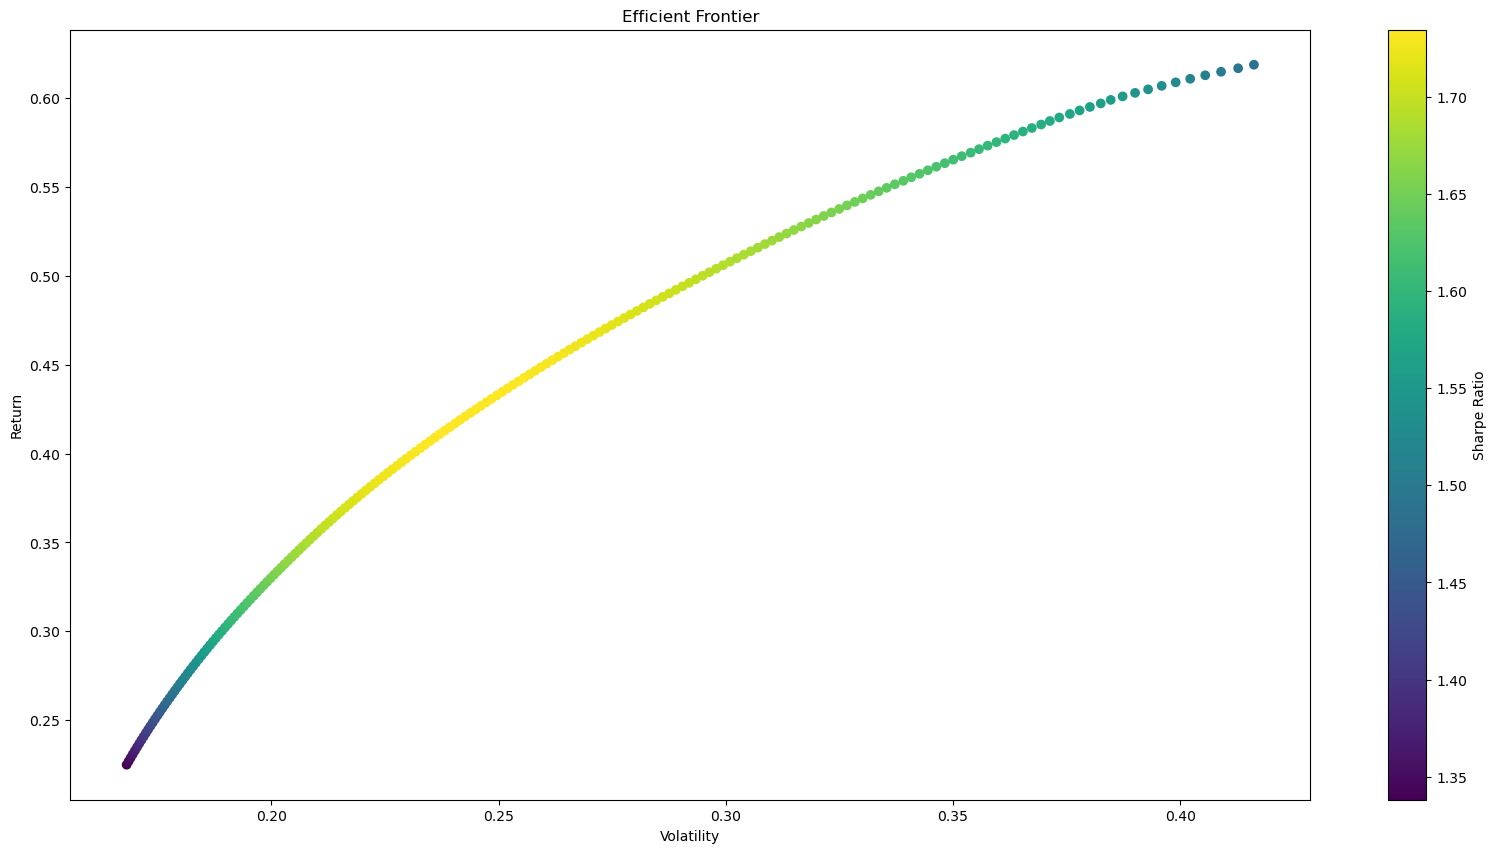

In [16]:
plt.figure(figsize=(20, 10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')

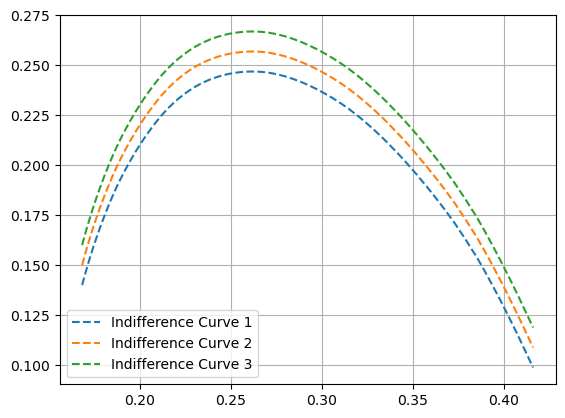

In [17]:
A = 3  # Risk aversion coefficient
for k in range(3):
    utility = ret_arr - A * (vol_arr ** 2) + k * 0.01  # Correct utility function for risk-averse investor
    plt.plot(vol_arr, utility, linestyle='--', label=f'Indifference Curve {k+1}')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Identify the optimal portfolio based on the highest utility
optimal_utility = ret_arr - A * (vol_arr ** 2)
optimal_index = np.argmax(optimal_utility)
optimal_weights = all_weights[optimal_index]
print("Optimal Weights for Markowitz Market Index:", optimal_weights)

Optimal Weights for Markowitz Market Index: [2.04913431e-01 2.31937383e-06 1.21064900e-05 3.02560527e-06
 5.70575098e-04 3.16994830e-06 5.57939578e-06 1.53493107e-01
 4.31739616e-01 4.37019539e-06 5.21156930e-06 4.73834559e-06
 5.93531417e-02 1.49871347e-01 1.82602150e-05]


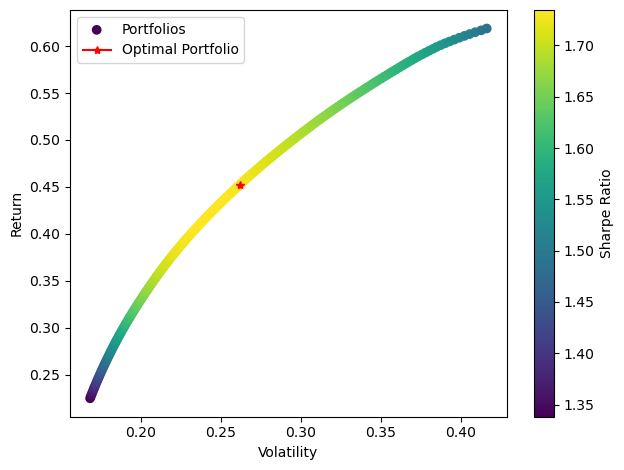

Risk of Optimal Portfolio: 0.2618
Return of Optimal Portfolio: 0.4525


In [19]:
optimal_utility = ret_arr - A * (vol_arr ** 2) + 0.02  
optimal_index = np.argmax(optimal_utility)
optimal_return = ret_arr[optimal_index]
optimal_risk = vol_arr[optimal_index]
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label='Portfolios')
plt.plot(optimal_risk, optimal_return, marker='*', color='red', label='Optimal Portfolio')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Risk of Optimal Portfolio: {optimal_risk:.4f}")
print(f"Return of Optimal Portfolio: {optimal_return:.4f}")

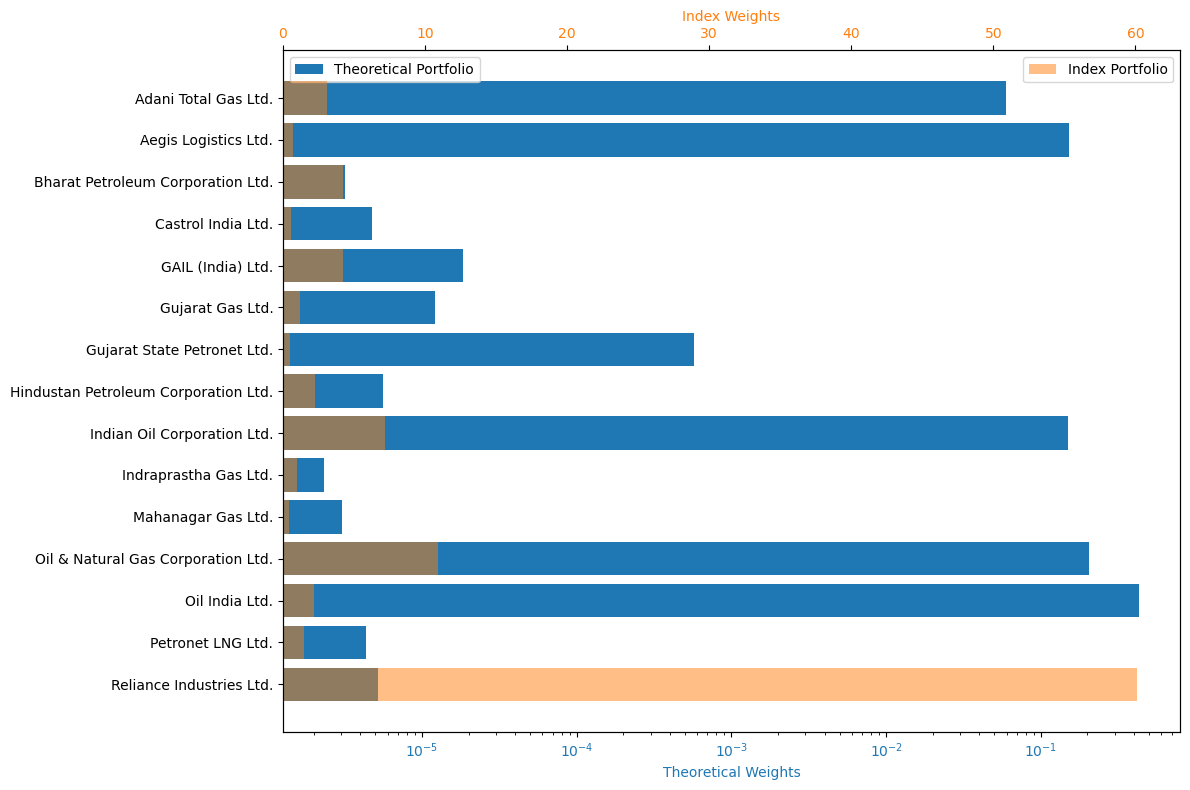

In [20]:
companies = ['Adani Total Gas Ltd.', 'Aegis Logistics Ltd.', 'Bharat Petroleum Corporation Ltd.', 
             'Castrol India Ltd.', 'GAIL (India) Ltd.', 'Gujarat Gas Ltd.', 'Gujarat State Petronet Ltd.', 
             'Hindustan Petroleum Corporation Ltd.', 'Indian Oil Corporation Ltd.', 'Indraprastha Gas Ltd.', 
             'Mahanagar Gas Ltd.', 'Oil & Natural Gas Corporation Ltd.', 'Oil India Ltd.', 'Petronet LNG Ltd.', 
             'Reliance Industries Ltd.']

theoretical_weights = [5.94E-02, 1.53E-01, 3.17E-06, 4.74E-06, 1.83E-05, 1.21E-05, 5.71E-04, 
                       5.58E-06, 1.50E-01, 2.32E-06, 3.03E-06, 2.05E-01, 4.32E-01, 4.37E-06, 5.21E-06]
index_weights = [3.11, 0.69, 4.23, 0.60, 4.25, 1.18, 0.52, 2.22, 7.21, 0.96, 0.40, 10.88, 2.17, 1.46, 60.13]
fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.barh(companies, theoretical_weights, color=color, label='Theoretical Portfolio')
ax1.set_xlabel('Theoretical Weights', color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_xscale('log')
ax2 = ax1.twiny()
color = 'tab:orange'
ax2.barh(companies, index_weights, color=color, alpha=0.5, label='Index Portfolio')
ax2.set_xlabel('Index Weights', color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.gca().invert_yaxis() 
plt.show()